# Heart Disease Prediction

Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains one of the top causes of deaths in the US.The Heart Disease and Stroke Statistics—2019 Update from the **American Heart Association** indicates that:

- 116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines.
- On average, someone dies of Cardiovascular disease(CVD) every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data.
- On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data.

In this notebook i will try to unleash useful insights using this heart disease datasets and by building stacked ensemble model by combining the power of best performing machine learning algorithms.

This notebook is divided into 13 major steps which are as follows:

1. Data description
2. Importing Libraries & setting up environment
3. Loading dataset
4. Data Cleaning & Preprocessing
5. Exploratory Data Analysis
6. Outlier Detection & Removal
7. Training & Test Split
8. Cross Validation
9. Model Building
10. Model evaluation & comparison
11. Feature Selection
12. Model Evaluation
13. Conclusion

### Dataset Description

This dataset consist 11 features and a target variable:

1. **Age:** Patient's Age in Years
2. **Sex:** Gender of Patient (Male->1,Female->0)
3. **Chest Pain Type:** Type of chest pain experienced by patient categorized into: 1. Typical 2. Typical Angina 3. Non anginal pain 4 Asymptotic
4. **Resting bps:** Level of Blood Pressure at resting mode in mm/HG
5. **Cholestrol:** Serum Chorestrol in mg/dl
6. **Fasting Blood Sugar:** Blood Sugar levels on fasting>120 mg/dl represents as 1 incase of true and 0 as false.
7. **Resting ecg:** Result of electrocardiogram while at rest are represented as 3 distinct values 0: Normal 1: Abnormality in ST-T wave 2: Left Venticular Hypertrophy
8. **Max Heart Rate:** Maximum heart rate achieved.
9. **Exercise Angina:** Angina induced by exercise, 0 depicting NO and 1 depicting Yes.
10. **Oldpeak:** Exercise indused ST-depression in comparison with the state of rest.
11. **ST slope:** ST segment measured in terms of slope during peak exercise. 0-> Normal,1-> upsloping, 2->Flat, 3->Downsampling
12. **Target:** It is the target variable which we have to predict. 1-> Patient is suffering from heart disease risk, 0-> Patient is normal

### Importing Libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Data wrangling and pre-processing
import pandas as pd
import numpy as np

In [11]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Train_Test Split
from sklearn.model_selection import train_test_split

In [13]:
#model Validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,fbeta_score
from sklearn import metrics

In [14]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [15]:
# Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib
import sklearn
import xgboost as xgb
import keras
from scipy import stats

In [16]:
# Versions
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Sklearn: {}".format(sklearn.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))
print("Keras: {}".format(keras.__version__))

Pandas: 2.2.2
Numpy: 1.26.4
Sklearn: 1.5.1
Matplotlib: 3.9.2
Keras: 3.8.0


### Loading Dataset

In [18]:
data = pd.read_csv('C:/Users/adeel/Downloads/heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [19]:
# Making all the 1 in one group and 0 in other group of target
data.groupby('target').size()

target
0    561
1    629
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Data Cleaning and Preprocessing

In [22]:
# Renaming features/Columns to proper name
data.columns=['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','Resting_ecg','Max_Heart_rate','exercise_induced_angina','st_depression','st_slope','target']

In [23]:
# Converting features to categorical features
data['chest_pain_type'][data['chest_pain_type']==1]='Typical Angina'
data['chest_pain_type'][data['chest_pain_type']==2]='aTypical Angina'
data['chest_pain_type'][data['chest_pain_type']==3]='Non Anginal Pain'
data['chest_pain_type'][data['chest_pain_type']==4]='Asymptotic'

In [24]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,0,172,0,0.0,1,0
1,49,0,Non Anginal Pain,160,180,0,0,156,0,1.0,2,1
2,37,1,aTypical Angina,130,283,0,1,98,0,0.0,1,0
3,48,0,Asymptotic,138,214,0,0,108,1,1.5,2,1
4,54,1,Non Anginal Pain,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,0,132,0,1.2,2,1
1186,68,1,Asymptotic,144,193,1,0,141,0,3.4,2,1
1187,57,1,Asymptotic,130,131,0,0,115,1,1.2,2,1
1188,57,0,aTypical Angina,130,236,0,2,174,0,0.0,2,1


In [25]:
data['Resting_ecg'][data['Resting_ecg']==0]='normal'
data['Resting_ecg'][data['Resting_ecg']==1]='ST-T wave abnormality'
data['Resting_ecg'][data['Resting_ecg']==2]='Left Ventricular hypertrophy'

data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,normal,172,0,0.0,1,0
1,49,0,Non Anginal Pain,160,180,0,normal,156,0,1.0,2,1
2,37,1,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,1,0
3,48,0,Asymptotic,138,214,0,normal,108,1,1.5,2,1
4,54,1,Non Anginal Pain,150,195,0,normal,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,normal,132,0,1.2,2,1
1186,68,1,Asymptotic,144,193,1,normal,141,0,3.4,2,1
1187,57,1,Asymptotic,130,131,0,normal,115,1,1.2,2,1
1188,57,0,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,2,1


In [26]:
data['st_slope'][data['st_slope']==1]='Upsloping'
data['st_slope'][data['st_slope']==2]='Flat'
data['st_slope'][data['st_slope']==3]='Downsloping'

data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,1,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,0,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,1,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,0,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,1,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,Typical Angina,110,264,0,normal,132,0,1.2,Flat,1
1186,68,1,Asymptotic,144,193,1,normal,141,0,3.4,Flat,1
1187,57,1,Asymptotic,130,131,0,normal,115,1,1.2,Flat,1
1188,57,0,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,Flat,1


In [27]:
data['sex']=data.sex.apply(lambda x:'Male' if x==1 else 'Female')
data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,Male,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,Female,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,Male,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,Female,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,Male,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,Male,Typical Angina,110,264,0,normal,132,0,1.2,Flat,1
1186,68,Male,Asymptotic,144,193,1,normal,141,0,3.4,Flat,1
1187,57,Male,Asymptotic,130,131,0,normal,115,1,1.2,Flat,1
1188,57,Female,aTypical Angina,130,236,0,Left Ventricular hypertrophy,174,0,0.0,Flat,1


In [28]:
data['chest_pain_type'].value_counts()

chest_pain_type
Asymptotic          625
Non Anginal Pain    283
aTypical Angina     216
Typical Angina       66
Name: count, dtype: int64

In [29]:
data['Resting_ecg'].value_counts()

Resting_ecg
normal                          684
Left Ventricular hypertrophy    325
ST-T wave abnormality           181
Name: count, dtype: int64

In [30]:
data['st_slope'].value_counts()

st_slope
Flat           582
Upsloping      526
Downsloping     81
0                1
Name: count, dtype: int64

In [31]:
# Dropping row with st_slope=0
data.drop(data[data.st_slope==0].index,inplace=True)

In [32]:
data['st_slope'].value_counts()
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,Resting_ecg,Max_Heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,Male,aTypical Angina,140,289,0,normal,172,0,0.0,Upsloping,0
1,49,Female,Non Anginal Pain,160,180,0,normal,156,0,1.0,Flat,1
2,37,Male,aTypical Angina,130,283,0,ST-T wave abnormality,98,0,0.0,Upsloping,0
3,48,Female,Asymptotic,138,214,0,normal,108,1,1.5,Flat,1
4,54,Male,Non Anginal Pain,150,195,0,normal,122,0,0.0,Upsloping,0


In [33]:
data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
Resting_ecg                0
Max_Heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

### Exploratory Data Analysis

In [35]:
data.shape

(1189, 12)

In [36]:
data.describe(include=[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,132.138772,210.376787,0.212784,139.739277,0.387721,0.923549,0.528175
std,9.352961,18.369251,101.462185,0.409448,25.527386,0.487435,1.086464,0.499416
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


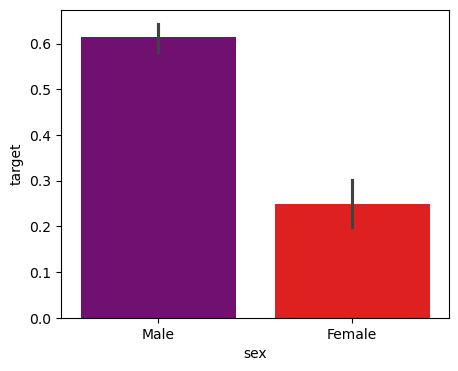

In [37]:
plt.figure(figsize=(5,4))
sns.barplot(x=data['sex'], y=data['target'], palette=['purple', 'red'])
plt.show()

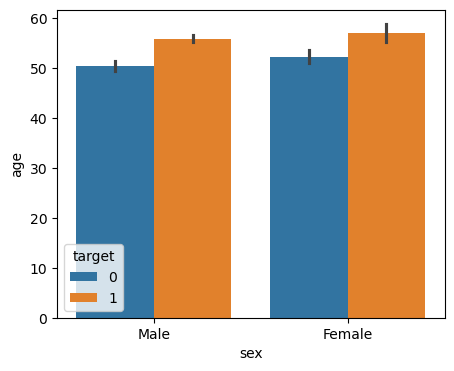

In [38]:
plt.figure(figsize=(5,4))
sns.barplot(x='sex', y='age', hue='target', data=data)
plt.show()

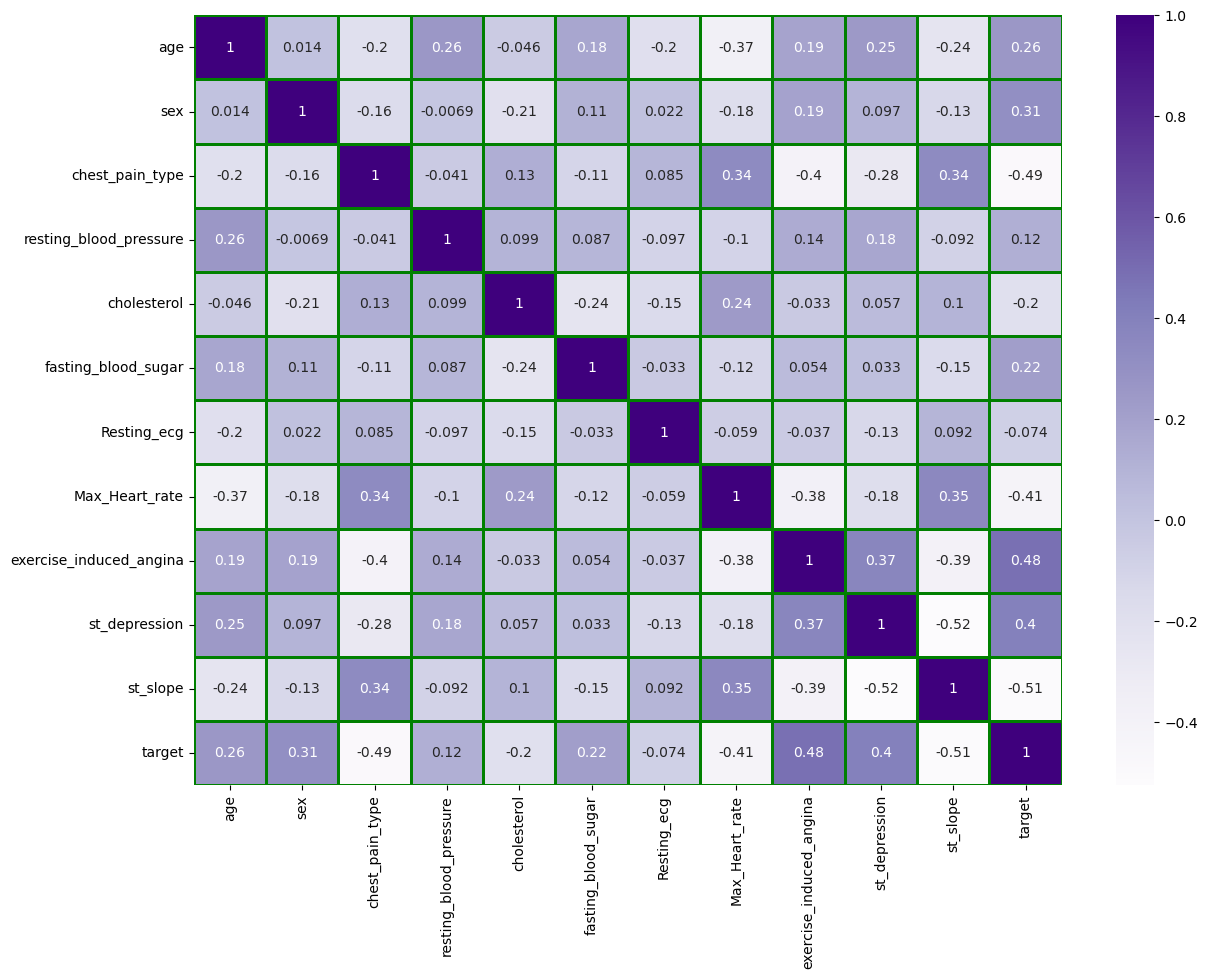

In [39]:
data_encoded = data.copy()

# Convert categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = encoder.fit_transform(data_encoded[col])

corr_matrix = data_encoded.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, linecolor='Green', linewidth=1.0)
plt.show()

<Axes: xlabel='age'>

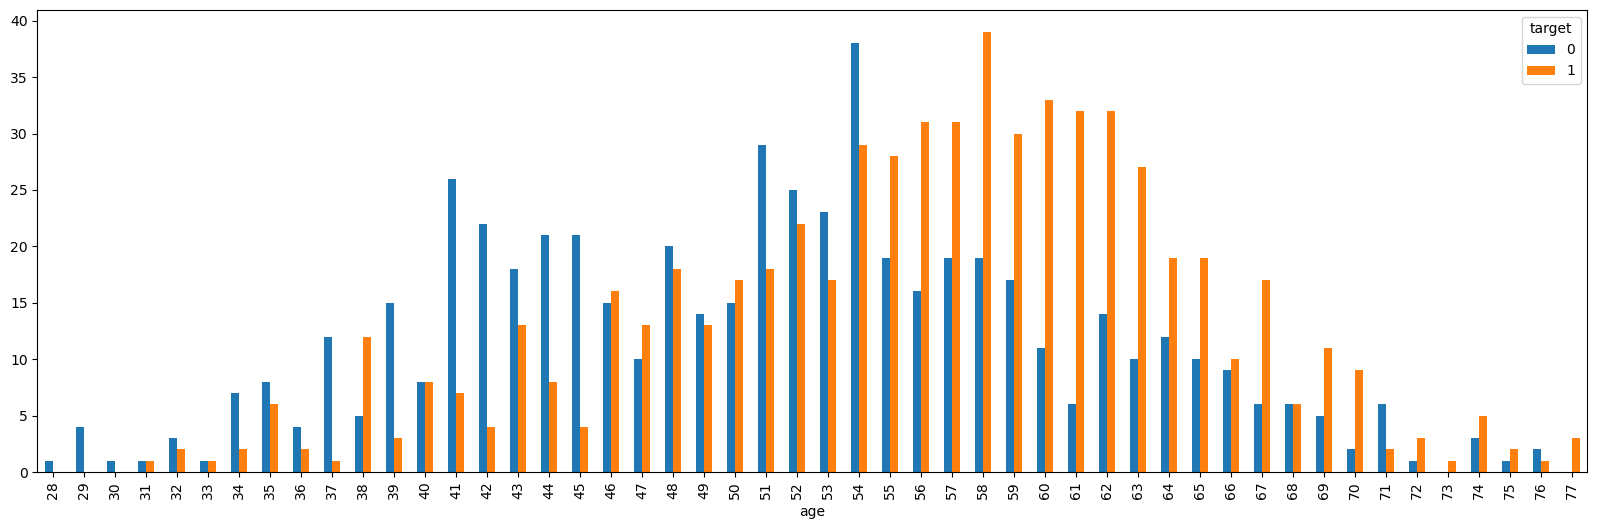

In [40]:
pd.crosstab(data.age,data.target).plot(kind='bar',figsize=(20,6))

In [41]:
data.describe(include=['object'])

,sex,chest_pain_type,Resting_ecg,st_slope
count,1189,1189,1189,1189
unique,2,4,3,3
top,Male,Asymptotic,normal,Flat
freq,908,625,683,582


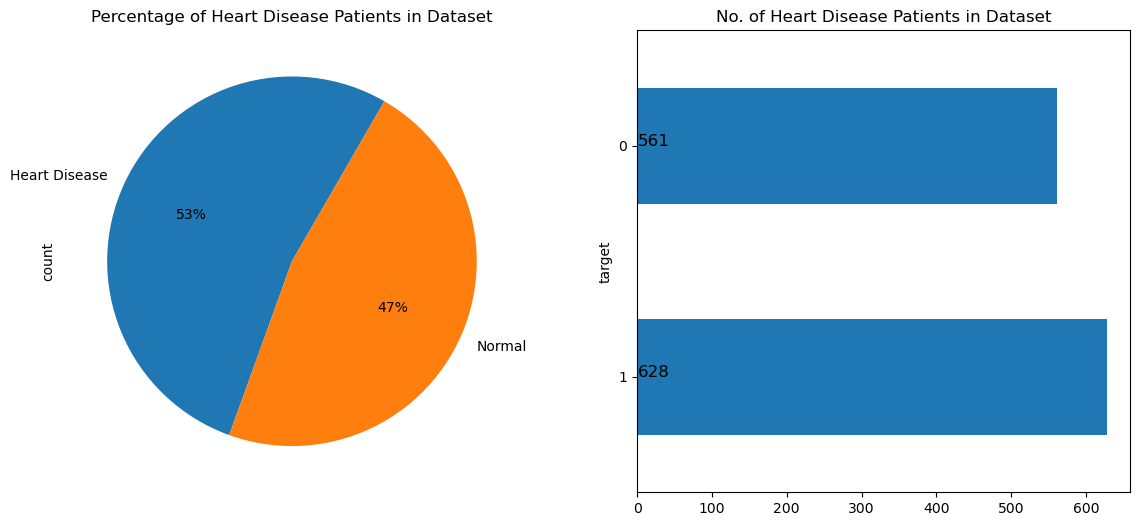

In [42]:
fig,(axis1,axis2) = plt.subplots(nrows=1,ncols=2,sharey=False,figsize=(14,6))
axis1 = data['target'].value_counts().plot.pie(x="Heart Disease",y="No. of Pateints",autopct='%1.0f%%',labels=['Heart Disease',"Normal"],startangle=60,ax=axis1)
axis1.set(title = "Percentage of Heart Disease Patients in Dataset")

axis2 = data['target'].value_counts().plot(kind='barh',ax=axis2)
for i,j in enumerate(data['target'].value_counts().values):
    axis2.text(.5,i,j,fontsize=12)
axis2.set(title = "No. of Heart Disease Patients in Dataset")
plt.show()

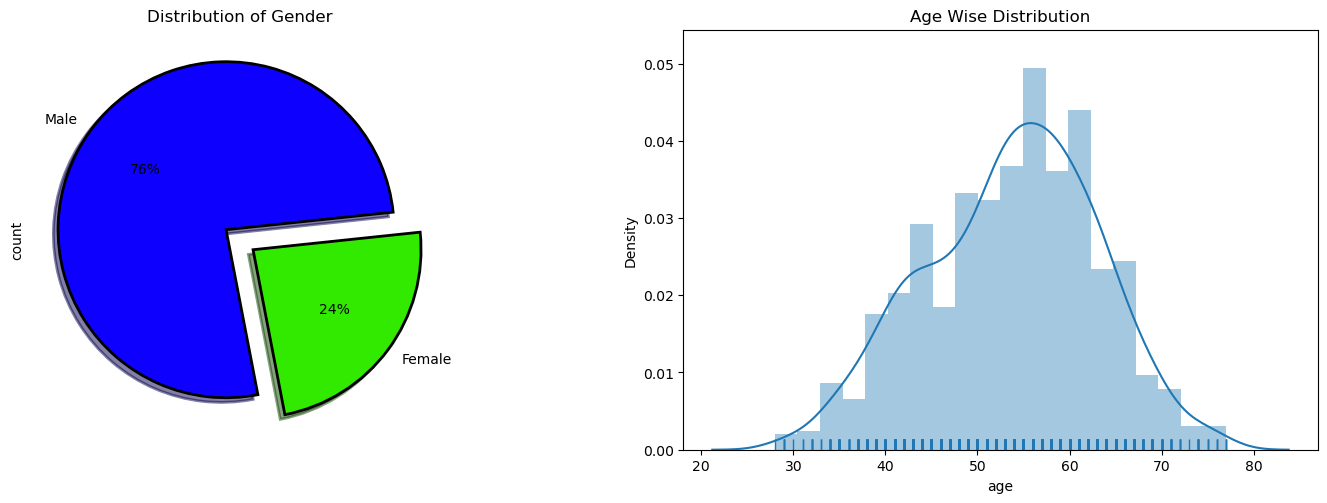

In [43]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data['sex'].value_counts().plot.pie(autopct='%1.0f%%',colors=sns.color_palette("prism",5),startangle=6, wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow=True)
plt.title("Distribution of Gender")

plt.subplot(222)
ax = sns.distplot(data['age'],rug=True)
plt.title("Age Wise Distribution")
plt.show()

In [44]:
attr_1=data[data["target"]==1]
attr_0=data[data["target"]==0]

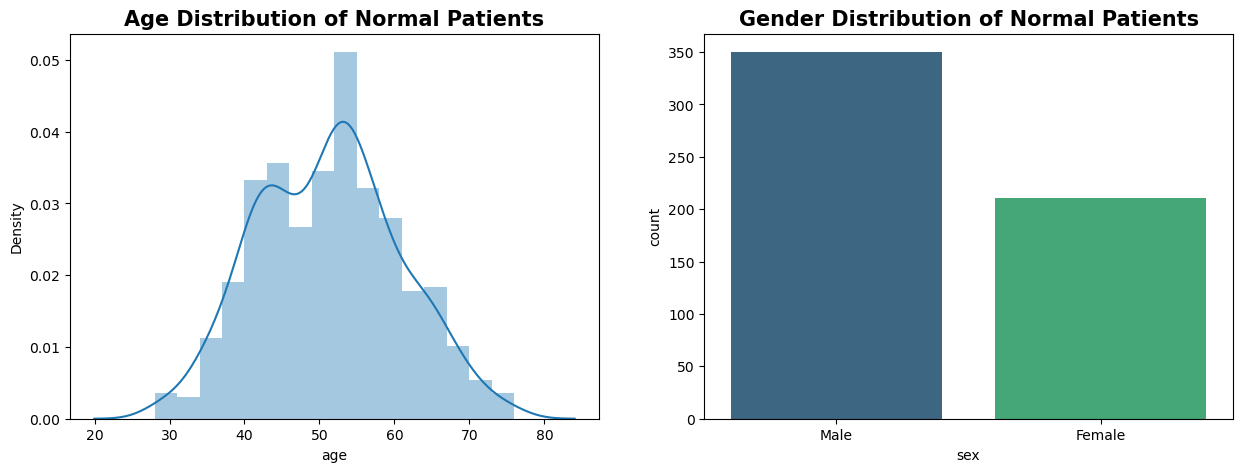

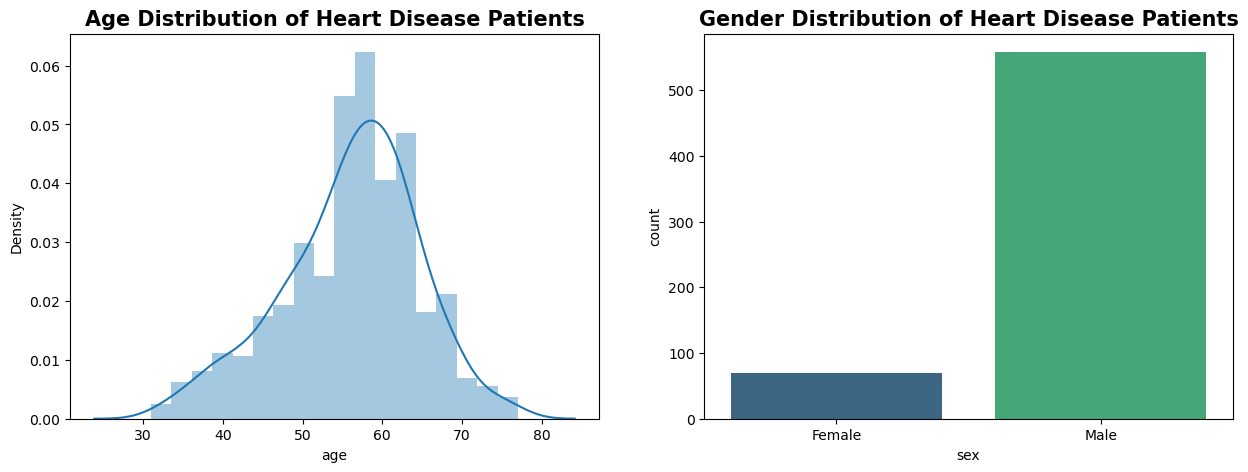

In [45]:
#Plotting normal Patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('Age Distribution of Normal Patients',fontsize=15,weight='bold')

ax2 = plt.subplot2grid((1, 2), (0, 1))  
sns.countplot(x=attr_0['sex'], palette='viridis', ax=ax2)
plt.title("Gender Distribution of Normal Patients", fontsize=15, weight="bold")
plt.show()

# plotting heart patients
fig=plt.figure(figsize=(15,5))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title("Age Distribution of Heart Disease Patients",fontsize=15,weight="bold")

ax2 = plt.subplot2grid((1, 2), (0, 1))  
sns.countplot(x=attr_1['sex'], palette='viridis', ax=ax2)
plt.title("Gender Distribution of Heart Disease Patients", fontsize=15, weight="bold")
plt.show()

### Distribution of chest pain types

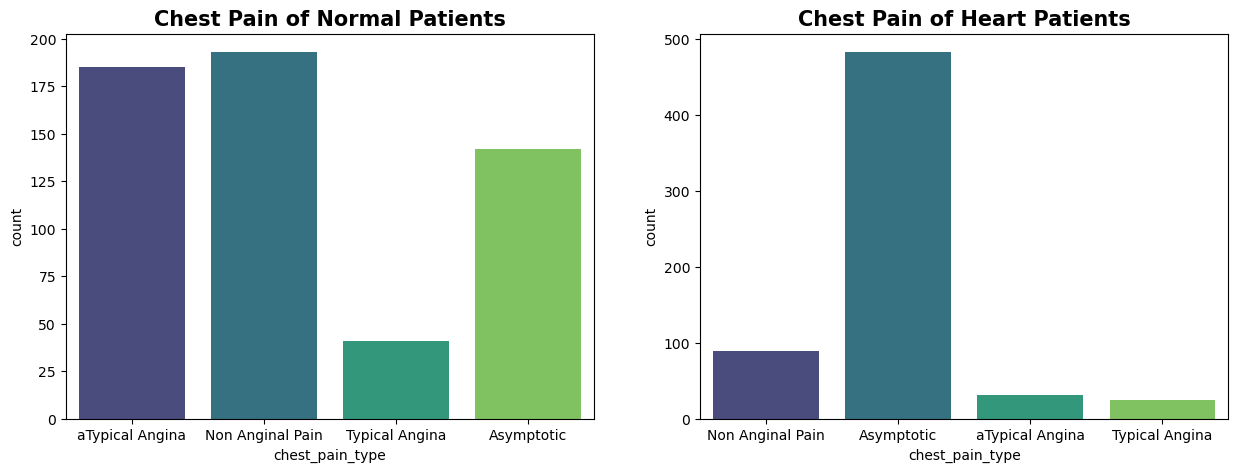

In [47]:
# Plotting normal and heart patients
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0))
sns.countplot(x=attr_0['chest_pain_type'], palette='viridis', ax=ax1)
plt.title('Chest Pain of Normal Patients', fontsize=15, weight='bold')

ax2 = plt.subplot2grid((1, 2), (0, 1))
sns.countplot(x=attr_1['chest_pain_type'], palette='viridis', ax=ax2)
plt.title("Chest Pain of Heart Patients", fontsize=15, weight="bold")

plt.show()

In [48]:
#Exploring the Heart Disease Patients based on ST Slope
plot_criteria=['st_slope','target']
sns.light_palette('red',as_cmap=True)
(round(pd.crosstab(data[plot_criteria[0]],data[plot_criteria[1]],normalize='columns')*100,2))

target,0,1
st_slope,,
Downsloping,3.92,9.39
Flat,21.93,73.09
Upsloping,74.15,17.52


### Distribution of Numerical Features

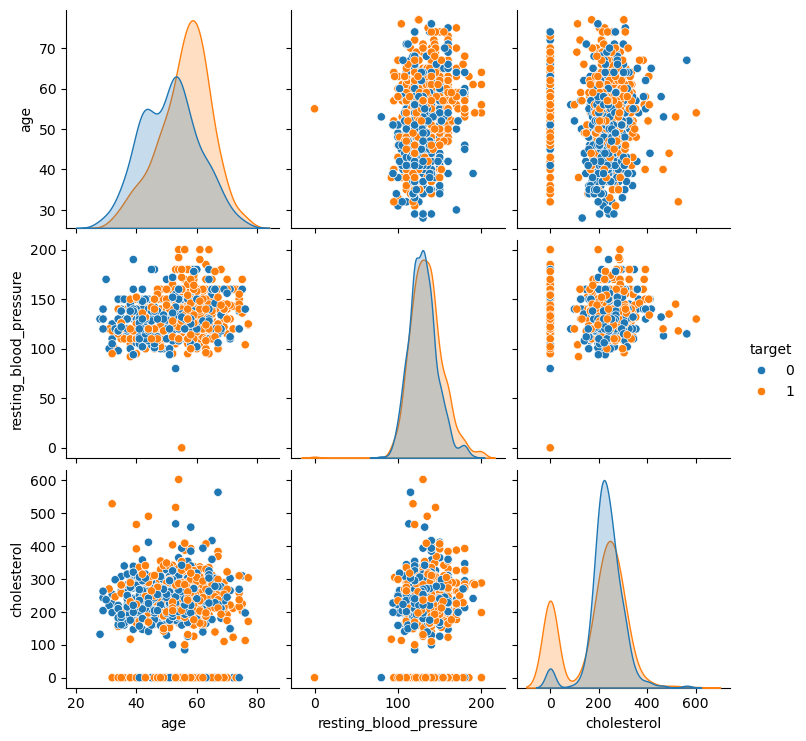

In [50]:
sns.pairplot(data,hue='target',vars=['age','resting_blood_pressure','cholesterol'])

<Axes: xlabel='resting_blood_pressure', ylabel='cholesterol'>

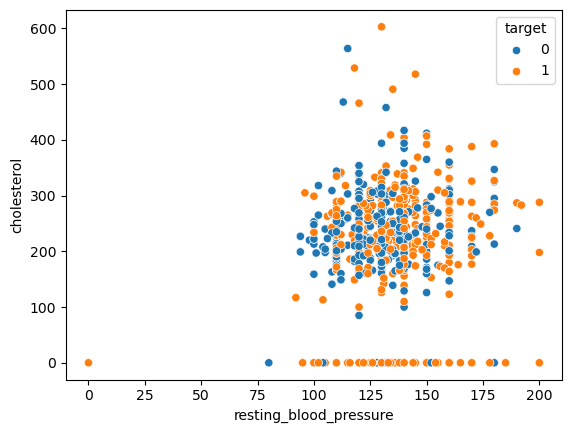

In [51]:
sns.scatterplot(x='resting_blood_pressure',y="cholesterol",hue='target',data=data)

<Axes: xlabel='resting_blood_pressure', ylabel='age'>

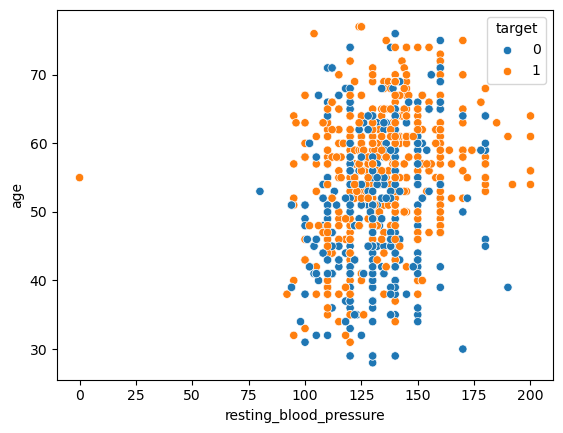

In [52]:
sns.scatterplot(x='resting_blood_pressure',y="age",hue='target',data=data)

### Outlier Detection and Removal

In [54]:
'''z-score=((score or x)-mean)/Standard Deviation'''

'z-score=((score or x)-mean)/Standard Deviation'

In [55]:
#filtering numeric features as age, resting bp,cholesterol and max heart rate achieved has outliers
data_numeric = data[['age','resting_blood_pressure','cholesterol','Max_Heart_rate',]]
data_numeric.head()

,age,resting_blood_pressure,cholesterol,Max_Heart_rate
0,40,140,289,172
1,49,160,180,156
2,37,130,283,98
3,48,138,214,108
4,54,150,195,122


In [56]:
#Calculating zscore of numeric columns in the dataset
z_score = np.abs(stats.zscore(data_numeric))
print(z_score)

           age  resting_blood_pressure  cholesterol  Max_Heart_rate
0     1.466266                0.428136     0.775228        1.264301
1     0.503599                1.517370     0.299516        0.637259
2     1.787155                0.116481     0.716067        1.635766
3     0.610562                0.319212     0.035725        1.243865
4     0.031216                0.972753     0.151616        0.695204
...        ...                     ...          ...             ...
1185  0.931451                1.205715     0.528727        0.303303
1186  1.528698                0.645983     0.171336        0.049408
1187  0.352105                0.116481     0.782658        0.969535
1188  0.352105                0.116481     0.252646        1.342681
1189  1.680192                0.319212     0.348816        1.303491

[1189 rows x 4 columns]


In [57]:
# Defining threshold for filtering outliers
threshold = 3
print(np.where(z_score>3))

(array([  30,   76,  109,  149,  242,  366,  371,  391,  400,  450,  592,
        617,  733,  760, 1012, 1038, 1074], dtype=int64), array([2, 2, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int64))


In [58]:
# Filtering outliers retaining only those data points which are below threshold
data=data[(z_score<3).all(axis=1)]
data.shape

(1172, 12)

In [59]:
## Encoding categorical variables
data=pd.get_dummies(data,drop_first=True)
data.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,target,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,0,True,False,False,True,False,True,False,True
1,49,160,180,0,156,0,1.0,1,False,True,False,False,False,True,True,False
2,37,130,283,0,98,0,0.0,0,True,False,False,True,True,False,False,True
3,48,138,214,0,108,1,1.5,1,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,0,True,True,False,False,False,True,False,True


In [60]:
# Segregating dataset into features i.e, X and Target variable i.e Y
X=data.drop(['target'],axis=1)
y=data['target']

X.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
0,40,140,289,0,172,0,0.0,True,False,False,True,False,True,False,True
1,49,160,180,0,156,0,1.0,False,True,False,False,False,True,True,False
2,37,130,283,0,98,0,0.0,True,False,False,True,True,False,False,True
3,48,138,214,0,108,1,1.5,False,False,False,False,False,True,True,False
4,54,150,195,0,122,0,0.0,True,True,False,False,False,True,False,True


In [61]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: target, dtype: int64

<Axes: title={'center': 'Correlation with Diabetes'}>

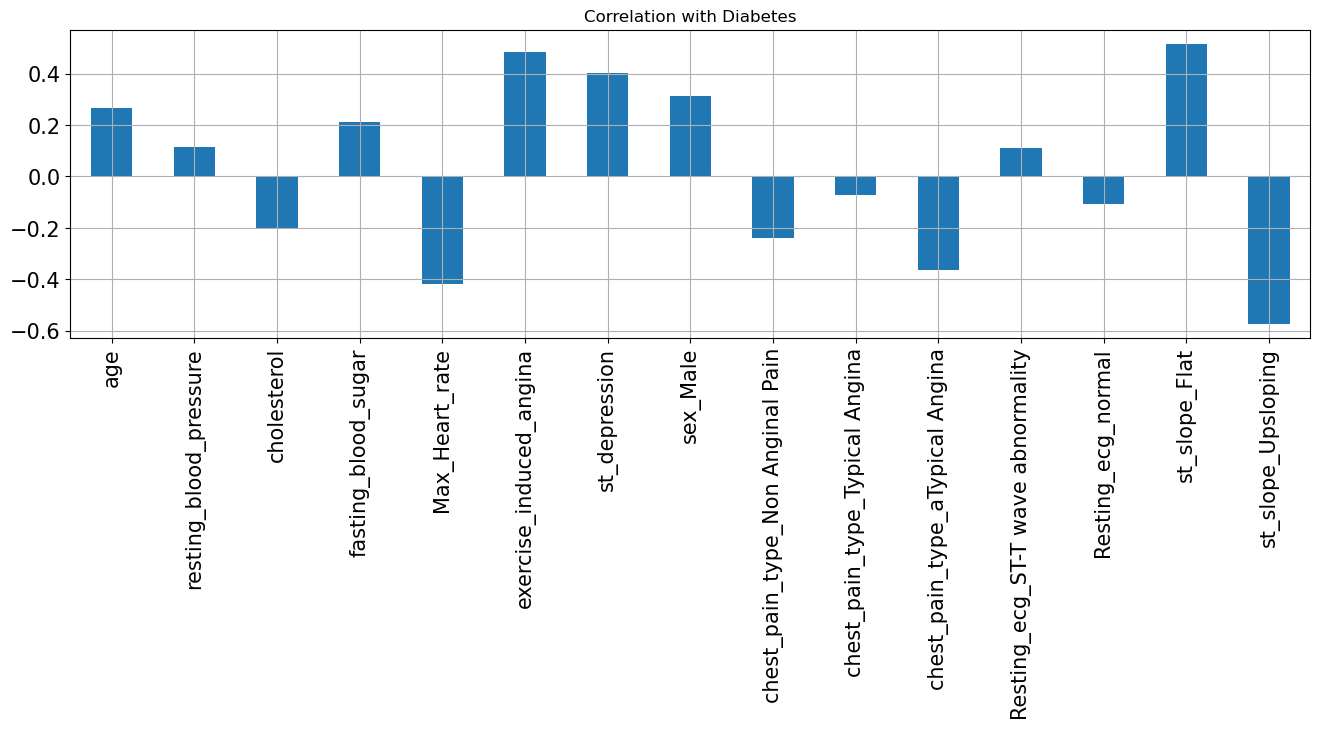

In [62]:
# Correlation with Response Variable Class
X.corrwith(y).plot.bar(figsize=(16,4),title="Correlation with Diabetes", fontsize=15 ,rot=90,grid=True)

### Train Test Split

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

In [65]:
## Checking Distribution of target variable in train test split
print('Distribution of target variable in training set')
print(ytrain.value_counts())

Distribution of target variable in training set
target
1    489
0    448
Name: count, dtype: int64


In [66]:
## Checking Distribution of target variable in train test split
print('Distribution of target variable in test set')
print(ytest.value_counts())

Distribution of target variable in test set
target
1    125
0    110
Name: count, dtype: int64


In [67]:
print('*'*20,'Training Set','*'*25)
print(xtrain.shape)
print(ytrain.shape)

print('*'*20,'Testing Set','*'*25)
print(xtest.shape)
print(ytest.shape)

******************** Training Set *************************
(937, 15)
(937,)
******************** Testing Set *************************
(235, 15)
(235,)


### Feature Normalization

In this step we will normalize all the numeric feature in the range of 0 to 1

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
605,74,155,310,112,1.5
89,55,140,229,110,0.5
520,63,96,305,121,1.0
372,66,150,0,108,2.0
222,51,160,303,150,1.0
...,...,...,...,...,...
586,57,180,285,120,0.8
988,34,118,182,174,0.0
77,35,140,167,150,0.0
611,46,134,310,126,0.0


In [71]:
xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]=scaler.fit_transform(xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']])
xtrain.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
605,0.938776,0.714286,0.631365,0,0.333333,1,0.465909,True,False,False,False,False,True,False,False
89,0.551020,0.571429,0.466395,0,0.318519,1,0.352273,True,False,False,False,False,True,True,False
520,0.714286,0.152381,0.621181,0,0.400000,1,0.409091,True,False,False,False,True,False,False,True
372,0.775510,0.666667,0.000000,0,0.303704,1,0.522727,True,False,False,False,False,True,True,False
222,0.469388,0.761905,0.617108,0,0.614815,1,0.409091,False,False,False,False,False,True,True,False


In [72]:
xtrain[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
605,0.938776,0.714286,0.631365,0.333333,0.465909
89,0.551020,0.571429,0.466395,0.318519,0.352273
520,0.714286,0.152381,0.621181,0.400000,0.409091
372,0.775510,0.666667,0.000000,0.303704,0.522727
222,0.469388,0.761905,0.617108,0.614815,0.409091
...,...,...,...,...,...
586,0.591837,0.952381,0.580448,0.392593,0.386364
988,0.122449,0.361905,0.370672,0.792593,0.295455
77,0.142857,0.571429,0.340122,0.614815,0.295455
611,0.367347,0.514286,0.631365,0.437037,0.295455


In [73]:
xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]

,age,resting_blood_pressure,cholesterol,Max_Heart_rate,st_depression
897,57,140,192,148,0.4
392,70,115,0,92,0.0
942,54,124,266,109,2.2
982,52,128,255,161,0.0
2,37,130,283,98,0.0
...,...,...,...,...,...
332,56,115,0,82,-1.0
143,53,140,243,155,0.0
75,46,150,163,116,0.0
32,54,125,224,122,2.0


In [74]:
xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']]=scaler.transform(xtest[['age','resting_blood_pressure','cholesterol','Max_Heart_rate','st_depression']])
xtest.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_Heart_rate,exercise_induced_angina,st_depression,sex_Male,chest_pain_type_Non Anginal Pain,chest_pain_type_Typical Angina,chest_pain_type_aTypical Angina,Resting_ecg_ST-T wave abnormality,Resting_ecg_normal,st_slope_Flat,st_slope_Upsloping
897,0.591837,0.571429,0.391039,0,0.600000,0,0.340909,True,False,False,False,False,True,True,False
392,0.857143,0.333333,0.000000,0,0.185185,1,0.295455,True,False,False,False,True,False,True,False
942,0.530612,0.419048,0.541752,0,0.311111,1,0.545455,True,False,False,False,False,False,True,False
982,0.489796,0.457143,0.519348,0,0.696296,1,0.295455,True,False,False,False,False,True,False,True
2,0.183673,0.476190,0.576375,0,0.229630,0,0.295455,True,False,False,True,True,False,False,True


### Model Building

#### Random Forest Classifier(Criterion= 'entropy')

In [137]:
rf_ent=RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(xtrain,ytrain)

y_pred_rfe=rf_ent.predict(xtest)

y_pred_rfe

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Multi Layer Perceptron

In [149]:
mlp=MLPClassifier()

mlp.fit(xtrain,ytrain)
y_pred_mlp=mlp.predict(xtest)

y_pred_mlp

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### K Nearest Neighbour (n=9)

In [147]:
knn=KNeighborsClassifier(9)

knn.fit(xtrain,ytrain)
y_pred_knn=knn.predict(xtest)

y_pred_knn

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Extra Tree Classifier (n_estimator=100)

In [152]:
et_100=ExtraTreesClassifier(n_estimators=100)
et_100.fit(xtrain,ytrain)
y_pred_et_100=et_100.predict(xtest)

y_pred_et_100

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### XGBoost(n_estimators=500)

In [155]:
Xgb=xgb.XGBClassifier(n_estimators=500)


Xgb.fit(xtrain,ytrain)
y_pred_xgb=Xgb.predict(xtest)

y_pred_xgb

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

### Support Vector Classifier (kernel='linear')

In [160]:
svc=SVC(kernel='linear',gamma='auto',probability=True)

svc.fit(xtrain,ytrain)
y_pred_svc=svc.predict(xtest)

y_pred_svc

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Stochastic Gradient Descent

In [163]:
sgd=SGDClassifier(max_iter=1000,tol=1e-4)

sgd.fit(xtrain,ytrain)
y_pred_sgd=sgd.predict(xtest)

y_pred_sgd

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

### AdaBoost Classifier

In [166]:
ada=AdaBoostClassifier()

ada.fit(xtrain,ytrain)
y_pred_ada=ada.predict(xtest)

y_pred_ada

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Decision Tree Classifier (CART)

In [169]:
decc=DecisionTreeClassifier()

decc.fit(xtrain,ytrain)
y_pred_decc=decc.predict(xtest)

y_pred_decc

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

### Gradient Boosting Machine

In [172]:
gbm=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')

gbm.fit(xtrain,ytrain)
y_pred_gbm=gbm.predict(xtest)

y_pred_gbm

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.961702,0.939394,0.992,0.927273,0.964981,0.959636,1.380395,0.924464


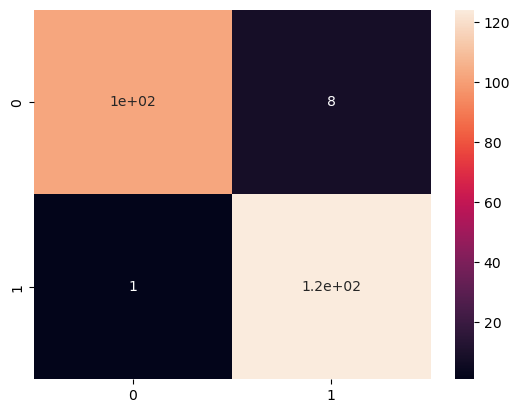

In [175]:
cm=confusion_matrix(ytest,y_pred_rfe)
sns.heatmap(cm,annot=True)
TN=cm[0][0]
FN=cm[1][0]
TP=cm[1][1]
FP=cm[0][1]
specificity=TN/(TN+FP)
loss_log=log_loss(ytest,y_pred_rfe)
acc=accuracy_score(ytest,y_pred_rfe)
roc=roc_auc_score(ytest,y_pred_rfe)
prec=precision_score(ytest,y_pred_rfe)
rec=recall_score(ytest,y_pred_rfe)
f1=f1_score(ytest,y_pred_rfe)

mathew=matthews_corrcoef(ytest,y_pred_rfe)
model_results=pd.DataFrame([['Random Forest',acc,prec,rec,specificity,f1,roc,loss_log,mathew]],
                          columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score','ROC','Log Loss','Mathew'])
model_results

### Comparison with other Models

In [182]:
data = { 'Random Forest': y_pred_rfe,
    'MLP': y_pred_mlp,
    'KNN': y_pred_knn,
    'Extra Tree Classifier': y_pred_et_100,
    'XGB': y_pred_xgb,
    'SVC': y_pred_svc,
    'SGD': y_pred_sgd,
    'AdaBoost': y_pred_ada,
    'CART': y_pred_decc,
    'GBM': y_pred_gbm
}

models = pd.DataFrame(data)

model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log Loss', 'Mathew'])

for column in models:
    cm = confusion_matrix(ytest, models[column])
    TN, FP = cm[0][0], cm[0][1]
    FN, TP = cm[1][0], cm[1][1]
    
    specificity = TN / (TN + FP)
    loss_log = log_loss(ytest, models[column])
    acc = accuracy_score(ytest, models[column])
    roc = roc_auc_score(ytest, models[column])
    prec = precision_score(ytest, models[column])
    rec = recall_score(ytest, models[column])
    f1 = f1_score(ytest, models[column])
    mathew = matthews_corrcoef(ytest, models[column])

    results = pd.DataFrame([[column, acc, prec, rec, specificity, f1, roc, loss_log, mathew]],
                           columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1 Score', 'ROC', 'Log Loss', 'Mathew'])
    
    model_results = pd.concat([model_results, results], ignore_index=True)

model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log Loss,Mathew
0,Random Forest,0.961702,0.939394,0.992,0.927273,0.964981,0.959636,1.380395,0.924464
1,MLP,0.880851,0.881890,0.896,0.863636,0.888889,0.879818,4.294563,0.760577
2,KNN,0.868085,0.840580,0.928,0.800000,0.882129,0.864000,4.754695,0.737832
3,Extra Tree Classifier,0.940426,0.930233,0.960,0.918182,0.944882,0.939091,2.147281,0.880619
4,XGB,0.953191,0.938462,0.976,0.927273,0.956863,0.951636,1.687150,0.906575
5,SVC,0.872340,0.862595,0.904,0.836364,0.882812,0.870182,4.601317,0.743779
6,SGD,0.808511,0.925532,0.696,0.936364,0.794521,0.816182,6.901976,0.644087
7,AdaBoost,0.863830,0.854962,0.896,0.827273,0.875000,0.861636,4.908072,0.726610
8,CART,0.889362,0.923077,0.864,0.918182,0.892562,0.891091,3.987808,0.780594
9,GBM,0.893617,0.878788,0.928,0.854545,0.902724,0.891273,3.834431,0.786965


### ROC AUC Curve

Text(0.5, 1.0, 'Receiver Operator Characteristic curves')

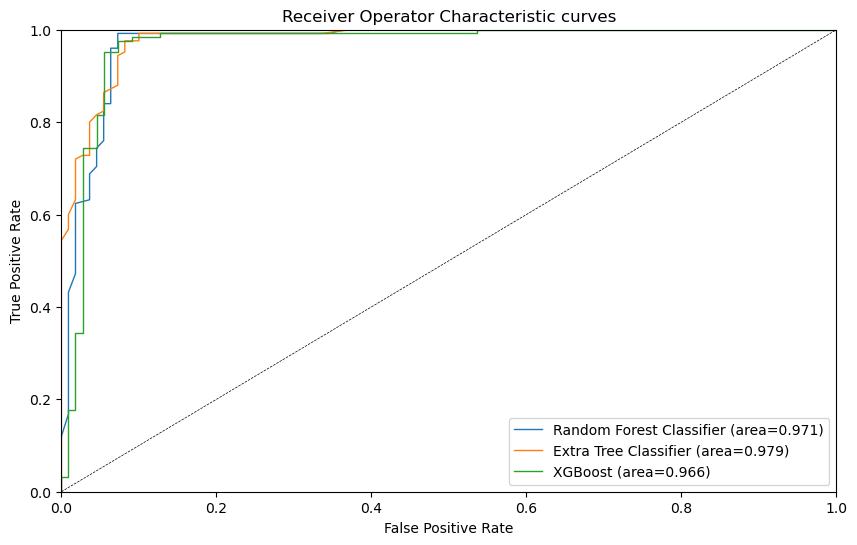

In [187]:
def roc_auc_plot(ytrue,yproba,label=' ',l='-',lw=1.0):
    from sklearn.metrics import roc_curve,roc_auc_score
    fpr,tpr,_=roc_curve(ytrue,yproba[:,1])
    ax.plot(fpr,tpr,linestyle=l,linewidth=lw,label="%s (area=%.3f)"%(label,roc_auc_score(ytrue,yproba[:,1])))

f,ax=plt.subplots(figsize=(10,6))
roc_auc_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
roc_auc_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
roc_auc_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')
ax.plot([0,1],[0,1],color='k',linewidth=0.5,linestyle='--')
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_title('Receiver Operator Characteristic curves')

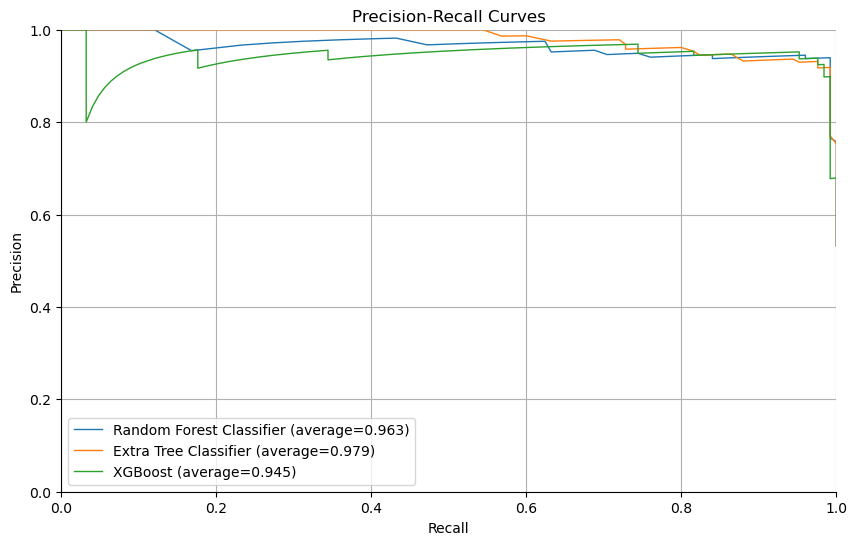

In [191]:
def precision_recall_plot(ytrue,yproba,label=" ",l='-',lw=1.0):
    from sklearn.metrics import precision_recall_curve,average_precision_score
    precision,recall,_=precision_recall_curve(ytest,yproba[:,1])
    average_precision=average_precision_score(ytest,yproba[:,1])
    ax.plot(recall,precision,label="%s (average=%.3f)"%(label,average_precision),
            linestyle=l,linewidth=lw)
f,ax=plt.subplots(figsize=(10,6))
precision_recall_plot(ytest,rf_ent.predict_proba(xtest),label='Random Forest Classifier',l='-')
precision_recall_plot(ytest,et_100.predict_proba(xtest),label='Extra Tree Classifier',l='-')
precision_recall_plot(ytest,Xgb.predict_proba(xtest),label='XGBoost',l='-')

ax.legend(loc='lower left')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlim([0,1])
ax.grid(True)
ax.set_ylim([0,1])
ax.set_title('Precision-Recall Curves')
sns.despine()

### Feature Selection

In [194]:
num_feats=11
def cor_selector(X,y,num_feats):
    cor_list=[]
    feature_name=X.columns.tolist()
    #Calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor=np.corrcoef(X[i],y)[0,1]
        cor_list.append(cor)
    #Replace NaN with 0
    cor_list=[0 if np.isnan(i) else i for i in cor_list]
    #feature name
    cor_feature=X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    #feature Selection? 0 for not select, 1 for select
    cor_support=[True if i in cor_feature else False for i in feature_name]
    return cor_support,cor_feature
cor_support,cor_feature=cor_selector(X,y,num_feats)
print(str(len(cor_feature)),'selected features')

11 selected features


In [196]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [200]:
X_norm=MinMaxScaler().fit_transform(X)
chi_selector=SelectKBest(chi2,k=num_feats)

chi_selector.fit(X_norm,y)
chi_support=chi_selector.get_support()
chi_feature=X.loc[:,chi_support].columns.tolist()

print(str(len(chi_feature)),'selected features')

11 selected features


In [202]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector=RFE(estimator=LogisticRegression(),n_features_to_select=num_feats,step=10,verbose=5)

rfe_selector.fit(X_norm,y)
rfe_support =rfe_selector.get_support()
rfe_feature=X.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)),'selected features')

Fitting estimator with 15 features.
11 selected features


In [204]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [206]:
embeded_lr_selector=SelectFromModel(LogisticRegression(penalty='l2',solver='lbfgs'),max_features=num_feats)

embeded_lr_selector.fit(X_norm,y)
embeded_lr_support=embeded_lr_selector.get_support()
embeded_lr_feature=X.loc[:,embeded_lr_support].columns.tolist()

print(str(len(embeded_lr_feature)),'selected features')

6 selected features


In [208]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector=SelectFromModel(RandomForestClassifier(n_estimators=100,criterion='gini'),max_features=num_feats)
embeded_rf_selector.fit(X,y)
embeded_rf_support=embeded_rf_selector.get_support()
embeded_rf_feature=X.loc[:,embeded_rf_support].columns.tolist()

print(str(len(embeded_rf_feature)),'selected features')

8 selected features


In [218]:
pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- ----------------------

In [226]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

num_feats = 10

X.columns = X.columns.str.replace(" ", "_")

lgbc = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32,
                      colsample_bytree=0.2, reg_alpha=3, reg_lambda=1,
                      min_split_gain=0.01, min_child_weight=40,
                      force_col_wise=True)
lgbc.fit(X, y)

embeded_lgbc_selector = SelectFromModel(lgbc, max_features=num_feats, prefit=True)
embeded_lgbc_support = embeded_lgbc_selector.get_support()
embeded_lgbc_feature = X.loc[:, embeded_lgbc_support].columns.tolist()

print(f"{len(embeded_lgbc_feature)} selected features")

[LightGBM] [Info] Number of positive: 614, number of negative: 558
[LightGBM] [Info] Total Bins 425
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523891 -> initscore=0.095636
[LightGBM] [Info] Start training from score 0.095636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [232]:
#put all selection together
feature_name=X.columns
feature_selection_df=pd.DataFrame({'Feature':feature_name,'Pearson':cor_support,'Chi-2':chi_support,'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                  'Random Forest':embeded_rf_support,'LightGBM':embeded_lgbc_support})

In [236]:
#count the selected times for each feature
feature_selection_df['total'] = feature_selection_df.iloc[:, 1:].astype(int).sum(axis=1)

In [238]:
#Display the top 100
feature_selection_df=feature_selection_df.sort_values(['total','Feature'],ascending=False)
feature_selection_df.index=range(1,len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,LightGBM,total
1,st_depression,True,True,True,True,True,True,6
2,st_slope_Flat,True,True,True,False,True,True,5
3,exercise_induced_angina,True,True,True,False,True,True,5
4,cholesterol,True,False,True,True,True,True,5
5,Max_Heart_rate,True,True,True,False,True,True,5
6,st_slope_Upsloping,True,True,True,False,True,False,4
7,sex_Male,True,True,True,True,False,False,4
8,chest_pain_type_aTypical_Angina,True,True,True,True,False,False,4
9,chest_pain_type_Non_Anginal_Pain,True,True,True,True,False,False,4
10,fasting_blood_sugar,True,True,True,False,False,False,3
